<a href="https://colab.research.google.com/github/TranPhuong3289/CNN_AI_Artificial-Intelligence/blob/main/FACE_DETECTIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NHẬN DẠNG KHUÔN MẶT CỦA TÔI**

In [12]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import cv2

In [25]:
#ĐƯỜNG DẪN ĐẾN TẬP TRAIN, VALIDATION,TEST TRONG MYDRIVE
train_data = '/content/drive/MyDrive/tai lieu AI/data_face/train'
val_data  =  '/content/drive/MyDrive/tai lieu AI/data_face/validation'
test_data =  '/content/drive/MyDrive/tai lieu AI/data_face/test'


In [26]:
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 61 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


In [27]:
#ĐẶT NHÃN
class_name = ['ADMIN', 'OTHERS']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)


labels:  ['ADMIN', 'OTHERS']
match class:  {'ADMIN': 0, 'OTHERS': 1}


In [31]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 512 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2,activation='softmax'))  #2 class_name
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 30, 30, 64)       

**COMPILE AND TRANING DATA**

In [32]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
#training với 50 lần học số lần học cùng lúc 50
face_train = model.fit(train_input,batch_size=50,epochs=50,verbose=1,validation_data=val_input)

Epoch 1/50
2/2 [==============================] - 200s 13s/step - loss: 12.4743 - accuracy: 0.5902 - val_loss: 26.0120 - val_accuracy: 0.5106
Epoch 2/50
2/2 [==============================] - 4s 2s/step - loss: 50.9915 - accuracy: 0.4754 - val_loss: 6.3622 - val_accuracy: 0.4894
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 14.5476 - accuracy: 0.5410 - val_loss: 3.0072 - val_accuracy: 0.4894
Epoch 4/50
2/2 [==============================] - 4s 2s/step - loss: 5.2782 - accuracy: 0.5738 - val_loss: 0.6537 - val_accuracy: 0.5957
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 1.2154 - accuracy: 0.5902 - val_loss: 0.7446 - val_accuracy: 0.5106
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 1.3895 - accuracy: 0.5082 - val_loss: 0.6836 - val_accuracy: 0.5106
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 0.8509 - accuracy: 0.5246 - val_loss: 0.6876 - val_accuracy: 0.5106
Epoch 8/50
2/2 [==================

**After training:**
*   Training accuracy: 95.6%
*   Validation accuracy: 99.44%


In [34]:
#Lưu lại model training
model.save('/content/drive/MyDrive/tai lieu AI/data_face/Face_classification.h5')

In [35]:
#In kết quả loss và accuracy của tập training data
test_loss, test_acc = model.evaluate(train_input)
print("\nTest Accuracy: ",test_acc)

2/2 [==============================] - 1s 470ms/step - loss: 0.0827 - accuracy: 0.9836

Test Accuracy:  0.9836065769195557


In [36]:
#Loading the model
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/data_face/Face_classification.h5')
model_1.summary()
#plot_model(model_1, show_shapes = True) #chạy hiển thị model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 30, 30, 64)       

Text(0.5, 0, 'epoch')

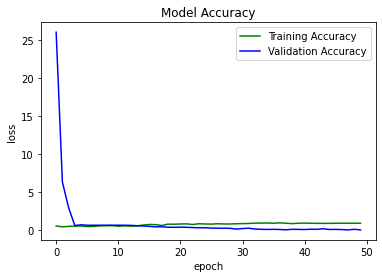

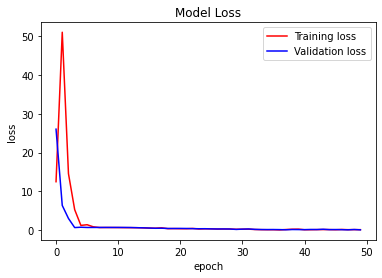

In [37]:
#Vẽ hàm mất mát và độ chính xác của model
#Graphing loss function and accuracy scores of the model

acc = face_train.history['accuracy'] #traning accuracy scores from the model has trained
val_acc = face_train.history['val_accuracy'] # validatioin accuracy scores from has trained
loss = face_train.history['loss']#training loss scores from the model that has trained
val_loss = val_acc = face_train.history['val_loss'] 


plt.plot(acc,'green', label = 'Training Accuracy')
plt.plot(val_acc,'blue', label = 'Validation Accuracy') 
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() #hiển thị chú thích
plt.figure()  # tách 2 data riêng biệt accuracy và loss

plt.plot(loss,'red',label = 'Training loss')
plt.plot(val_loss, 'blue',label = 'Validation loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# **DỰ ĐOÁN:**


In [38]:
#Cách 1: dự đoán
from google.colab import files
uploaded = files.upload()

Saving IMG_9136.JPG to IMG_9136.JPG


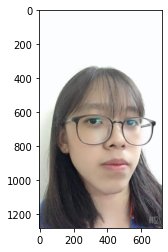

In [48]:
new_image = plt.imread('IMG_9136.JPG')
img = plt.imshow(new_image)

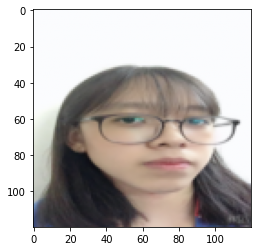

In [50]:
#Resize image
from skimage.transform import resize
resized_image = resize(new_image, (120,120,3))
img = plt.imshow(resized_image)

In [52]:
#model prediction
pre = model.predict(np.array([resized_image]))
#show the prediction
pre 

array([[0.98708576, 0.01291422]], dtype=float32)

In [57]:
#sắp xếp ảnh dự đoán gần nhất
list_index = [0,1]  #tùy theo cái nhãn đặt chú ý hàm range 
x = pre

for i in range(2):
  for j in range(2):
    if x[0][list_index[i]] > x[0][list_index[j]]:
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp
        #Show sắp xếp
        print(list_index)


[1, 0]
[0, 1]


In [66]:
#in ra 2 dự đoán cho 2 nhãn đặt
for i in range(2):
    print(class_name[list_index[i]], ':',round(pre[0][list_index[i]] * 100, 2) ,'%')

ADMIN : 98.71 %
OTHERS : 1.29 %


Đây là Phương ^.^


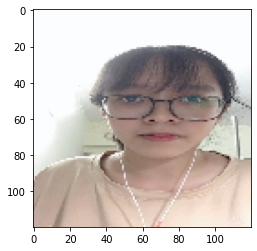

In [67]:
#Cách 2: dự đoán 
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_face/test/ADMIN/IMG_9042.JPG', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Đây là Phương ^.^")
if guess[0]==1:
  print("Không phải Phương!!")


Không phải Phương!!


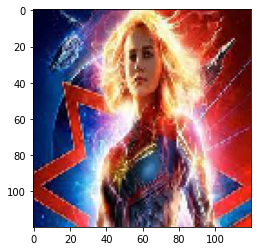

In [70]:

#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_face/test/OTHERS/download (13).jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Đây là Phương ^.^")
if guess[0]==1:
  print("Không phải Phương!!")


Đây là Phương ^.^


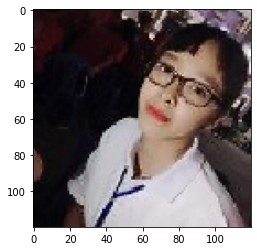

In [71]:
#Lấy ảnh từ tập test để dự đoán: 
pic = image.load_img('/content/drive/MyDrive/tai lieu AI/data_face/test/ADMIN/IZMTE0731.JPG', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Đây là Phương ^.^")
if guess[0]==1:
  print("Không phải Phương!!")